In [7]:
%matplotlib inline
import os

GIMME_DIR = "/Volumes/WorkDrive/gimmeSAD"
SIMOUT_DIR = os.path.join(GIMME_DIR, "replicates/")

os.chdir(GIMME_DIR)
import implicit_BI
import gimmeSAD
import numpy as np
import matplotlib.pyplot as plt
import itertools
import glob


In [2]:
def load_pidxy(filename):
    with open(filename) as infile:
        dat = []
        while True:
            next_n_lines = list(itertools.islice(infile, 12))
            if not next_n_lines:
                break
            lines = [list(x.strip("[").strip("]\n").split()) for x in next_n_lines[1:-1]]
            lines = list(itertools.chain.from_iterable([ map(int, x) for x in lines]))
            dat.append(lines)
    #dat = np.array(dat)
    return dat

In [4]:
with open("/Volumes/WorkDrive/gimmeSAD/output/pi_x_dxy.log") as infile:
    dat = []
    while True:
        next_n_lines = list(itertools.islice(infile, 12))
        if not next_n_lines:
            break
        lines = [list(x.strip("[").strip("]\n").split()) for x in next_n_lines[1:-1]]
        lines = list(itertools.chain.from_iterable([ map(int, x) for x in lines]))
        dat.append(lines)
dat = np.array(dat)
print(dat.shape)

(57, 100)


In [5]:
from matplotlib.mlab import PCA
print(dat.shape)
res = PCA(np.array(dat.T))

(57, 100)


lenfiles 66
lenfiles 66
explained variance ratio (first two components): [ 0.82376311  0.05718285]
doing 1 - lightsalmon doing 7 - tomato doing 9 - red doing 1 - royalblue doing 7 - blue doing 9 - navy

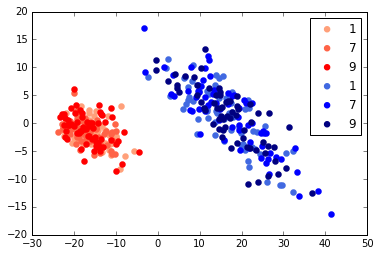

In [117]:
import collections 
SIMOUT_DIR = "tmp/"
C = ["0.01", "0.05"]
times = [1,7,9]
full_dat = []
subset_dat = []
for c in C:
    files = glob.glob(SIMOUT_DIR+"K_1000-C_{}*/pi_x_dxy.log".format(c))
    print("lenfiles {}".format(len(files)))
    full_dat = []
    for f in files:
        try:
            full_dat.append(load_pidxy(f))
        except:
            pass
    for t in times:
        subset_dat.extend([x[t] for x in full_dat])
pca = PCA(n_components=2)

X_r = pca.fit(subset_dat).transform(subset_dat)
print('explained variance ratio (first two components): %s'
      % str(pca.explained_variance_ratio_))
plt.figure()
x,y = zip(*X_r)
cur = 0
for col, idx, size in zip(["lightsalmon", "tomato", "red", "royalblue", "blue", "navy"], [66]*6, times*2):
    print("doing {} - {}".format(size, col)),
    plt.scatter(x[cur:idx+cur], y[cur:idx+cur], color=col, label=size, lw=2)
    cur+=idx
plt.legend(loc='upper right', scatterpoints=1)
plt.show()

(57, 100)
explained variance ratio (first two components): [ 0.62286836  0.23778228]


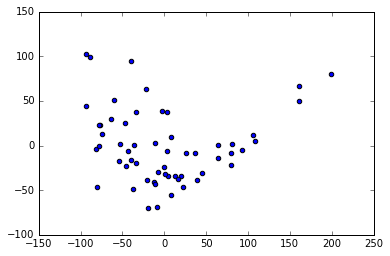

In [6]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

print(dat.shape)
pca = PCA(n_components=2)
X_r = pca.fit(dat).transform(dat)
print('explained variance ratio (first two components): %s'
      % str(pca.explained_variance_ratio_))
plt.figure()
x, y = zip(*X_r)
plt.scatter(x, y)

In [115]:
print([np.sum(x) for x in subset_dat])

[43, 40, 33, 37, 44, 50, 41, 35, 37, 37, 48, 47, 34, 33, 40, 34, 30, 39, 35, 39, 39, 40, 37, 44, 35, 36, 50, 35, 26, 42, 38, 42, 48, 36, 43, 41, 38, 37, 42, 39, 45, 40, 39, 41, 44, 41, 36, 42, 42, 42, 46, 45, 41, 37, 35, 37, 23, 43, 41, 47, 36, 39, 36, 54, 42, 43, 39, 41, 36, 45, 43, 39, 43, 39, 33, 46, 34, 44, 44, 33, 43, 39, 28, 39, 42, 36, 32, 44, 40, 39, 38, 38, 50, 39, 49, 40, 43, 35, 42, 43, 35, 42, 47, 40, 31, 45, 42, 30, 40, 50, 39, 34, 36, 42, 44, 44, 43, 45, 31, 44, 43, 48, 34, 32, 44, 38, 31, 37, 38, 37, 31, 37, 39, 42, 49, 53, 32, 36, 29, 45, 46, 38, 31, 47, 39, 47, 33, 41, 40, 44, 41, 34, 27, 39, 34, 37, 42, 40, 46, 42, 37, 39, 31, 44, 36, 43, 38, 39, 45, 41, 46, 37, 39, 41, 47, 47, 42, 46, 35, 46, 39, 37, 38, 36, 35, 35, 32, 45, 36, 42, 37, 39, 33, 43, 40, 42, 41, 29, 91, 100, 95, 106, 91, 108, 93, 111, 102, 99, 84, 90, 101, 93, 95, 99, 94, 109, 103, 101, 85, 99, 100, 94, 92, 112, 100, 96, 99, 105, 112, 103, 103, 96, 104, 102, 93, 96, 94, 94, 108, 93, 92, 97, 103, 105, 92

## Plot colonization rates

66
66
[10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10]
(1320, 100)
explained variance ratio (first two components): [ 0.81530358  0.05690712]
doing 0.05 - red
doing 0.01 - blue


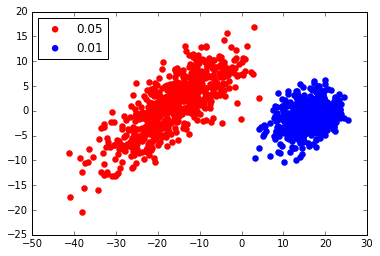

In [96]:
SIMOUT_DIR="tmp/"
K = [10000, 5000, 1000]
C = [0.05, 0.01]

dat = []
lens = []
for c in C:

    datfiles = glob.glob(SIMOUT_DIR+"K_1000-C_{}*/pi_x_dxy.log".format(c))
    print(len(datfiles))
    for f in datfiles:
        mydat = load_pidxy(f)
        dat.extend(mydat)
        lens.append(len(mydat))
print(lens)
dat = np.array(dat)
print(dat.shape)

pca = PCA(n_components=2)
X_r = pca.fit(dat).transform(dat)
print('explained variance ratio (first two components): %s'
      % str(pca.explained_variance_ratio_))
plt.figure()
x,y = zip(*X_r)
cur = 0
for col, idx, size in zip(["red", "blue"], [len(dat)/2]*2, C):
    print("doing {} - {}".format(size, col))
    plt.scatter(x[cur:idx+cur], y[cur:idx+cur], color=col, label=size, lw=2)
    cur+=idx
plt.legend(loc='upper left', scatterpoints=1)
plt.show()

In [91]:
len(dat)

1320

## Plot local community sizes

/Volumes/WorkDrive/gimmeSAD/simout/K_10000-C_0.01/pi_x_dxy.log
/Volumes/WorkDrive/gimmeSAD/simout/K_5000-C_0.01/pi_x_dxy.log
/Volumes/WorkDrive/gimmeSAD/simout/K_1000-C_0.01/pi_x_dxy.log
[100, 46, 2]
(148, 100)
explained variance ratio (first two components): [ 0.7633547   0.11368971]
doing 10000 - red
doing 5000 - blue
doing 1000 - yellow


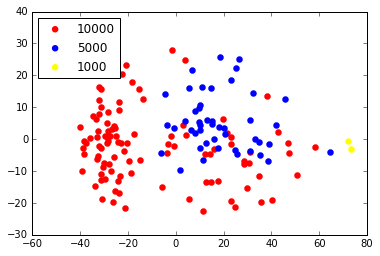

In [219]:
os.chdir(SIMOUT_DIR)
K = [10000, 5000, 1000]
C = [0.1, 0.01, 0.001]
multi_col = ["", "_x4", "_x10"]

dat = []
lens = []
for k in K:
    datfile = os.path.join(SIMOUT_DIR, "K_{}-C_0.01/pi_x_dxy.log".format(k))
    print(datfile)
    mydat = load_pidxy(datfile)
    dat.extend(mydat)
    lens.append(len(mydat))
print(lens)
dat = np.array(dat)
print(dat.shape)

pca = PCA(n_components=2)
X_r = pca.fit(dat).transform(dat)
print('explained variance ratio (first two components): %s'
      % str(pca.explained_variance_ratio_))
plt.figure()
x,y = zip(*X_r)
cur = 0
for col, idx, size in zip(["red", "blue", "yellow"], lens, K):
    print("doing {} - {}".format(size, col))
    plt.scatter(x[cur:idx+cur], y[cur:idx+cur], color=col, label=size, lw=2)
    cur+=idx
plt.legend(loc='upper left', scatterpoints=1)
plt.show()